# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#before starting to code following has done
#on dev environment, conda install -c pyviz hvplot geoviews, pip install citipy
#Api key added to weather_api_key in api_keys.py and saved
#Api key added to geoapify_key in api_keys.py and saved

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import json
#from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [148]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [149]:
# # city_weather = requests.get(query_url).json()
# # city_weather
# pprint

In [150]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    # If an error is experienced, skip the city?
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete 
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | berja
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | glace bay
Processing Record 7 of Set 1 | bazarak
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | znamenskoye
Processing Record 10 of Set 1 | kanniyakumari
Processing Record 11 of Set 1 | tulun
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | vadso
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | bamboo flat
Processing Re

Processing Record 21 of Set 4 | hasaki
Processing Record 22 of Set 4 | hotan
Processing Record 23 of Set 4 | san bernardo del viento
Processing Record 24 of Set 4 | miracema do tocantins
Processing Record 25 of Set 4 | port-gentil
Processing Record 26 of Set 4 | port augusta
Processing Record 27 of Set 4 | san fernando
Processing Record 28 of Set 4 | tayga
Processing Record 29 of Set 4 | farmville
Processing Record 30 of Set 4 | carnarvon
Processing Record 31 of Set 4 | argostolion
Processing Record 32 of Set 4 | aktau
Processing Record 33 of Set 4 | kiunga
Processing Record 34 of Set 4 | pishin
Processing Record 35 of Set 4 | st. john's
Processing Record 36 of Set 4 | bethel
Processing Record 37 of Set 4 | bredasdorp
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | joao camara
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | corn island
Processing Record 42 of Set 4 | freetown
Processing Record 43 of Set 4 | brigham city
Processing Record 4

Processing Record 4 of Set 8 | kataragama
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 8 | paranaiba
Processing Record 6 of Set 8 | sao raimundo nonato
Processing Record 7 of Set 8 | kavaratti
Processing Record 8 of Set 8 | esmeraldas
Processing Record 9 of Set 8 | lodeynoye pole
Processing Record 10 of Set 8 | prince rupert
Processing Record 11 of Set 8 | tarfaya
Processing Record 12 of Set 8 | bakanas
Processing Record 13 of Set 8 | namibe
Processing Record 14 of Set 8 | chany
Processing Record 15 of Set 8 | nova sintra
Processing Record 16 of Set 8 | magadan
Processing Record 17 of Set 8 | maricopa
Processing Record 18 of Set 8 | orkney
Processing Record 19 of Set 8 | bratca
Processing Record 20 of Set 8 | larkird
Processing Record 21 of Set 8 | torredembarra
Processing Record 22 of Set 8 | kokpekty
Processing Record 23 of Set 8 | san antonio del estrecho
City not found. Skipping...
-

Processing Record 18 of Set 11 | maamba
Processing Record 19 of Set 11 | homer
Processing Record 20 of Set 11 | sihanoukville
Processing Record 21 of Set 11 | sheregesh
Processing Record 22 of Set 11 | yamba
Processing Record 23 of Set 11 | zyryanskoye
Processing Record 24 of Set 11 | baukau
Processing Record 25 of Set 11 | harstad
Processing Record 26 of Set 11 | la tijera
Processing Record 27 of Set 11 | kibakwe
Processing Record 28 of Set 11 | garbahaarrey
Processing Record 29 of Set 11 | chingirlau
Processing Record 30 of Set 11 | mahanoro
Processing Record 31 of Set 11 | ataq
Processing Record 32 of Set 11 | strezhevoy
Processing Record 33 of Set 11 | chicoana
Processing Record 34 of Set 11 | moyale
Processing Record 35 of Set 11 | nantucket
Processing Record 36 of Set 11 | geraldton
Processing Record 37 of Set 11 | turmalina
Processing Record 38 of Set 11 | holly hill
Processing Record 39 of Set 11 | luderitz
Processing Record 40 of Set 11 | paoua
Processing Record 41 of Set 11 |

In [151]:
city_weather

{'coord': {'lon': 13.2343, 'lat': -8.8368},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 23,
  'feels_like': 23.65,
  'temp_min': 23,
  'temp_max': 23,
  'pressure': 1012,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1696195080,
 'sys': {'type': 1,
  'id': 2173,
  'country': 'AO',
  'sunrise': 1696135892,
  'sunset': 1696179724},
 'timezone': 3600,
 'id': 2240449,
 'name': 'Luanda',
 'cod': 200}

In [152]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [153]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,9.95,63,100,11.08,SH,1696194989
1,adamstown,-25.0660,-130.1015,20.52,82,10,11.43,PN,1696194989
2,papatowai,-46.5619,169.4708,13.45,62,26,9.56,NZ,1696194989
3,berja,36.8469,-2.9497,22.09,57,0,1.10,ES,1696194989
4,nuuk,64.1835,-51.7216,1.34,86,75,1.03,GL,1696194989


In [154]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/CitiesByYK.csv", index_label="City_ID")

In [155]:
# Read saved data
city_data_df = pd.read_csv("../output_data/CitiesByYK.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.95,63,100,11.08,SH,1696194989
1,adamstown,-25.0660,-130.1015,20.52,82,10,11.43,PN,1696194989
2,papatowai,-46.5619,169.4708,13.45,62,26,9.56,NZ,1696194989
3,berja,36.8469,-2.9497,22.09,57,0,1.10,ES,1696194989
4,nuuk,64.1835,-51.7216,1.34,86,75,1.03,GL,1696194989
5,glace bay,46.1969,-59.9570,17.76,78,75,3.09,CA,1696194989
6,bazarak,35.3129,69.5152,11.93,44,56,2.00,AF,1696194989
7,newman,37.3138,-121.0208,22.25,49,37,1.34,US,1696194861
8,znamenskoye,57.1281,73.8282,5.00,96,17,2.43,RU,1696194990


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

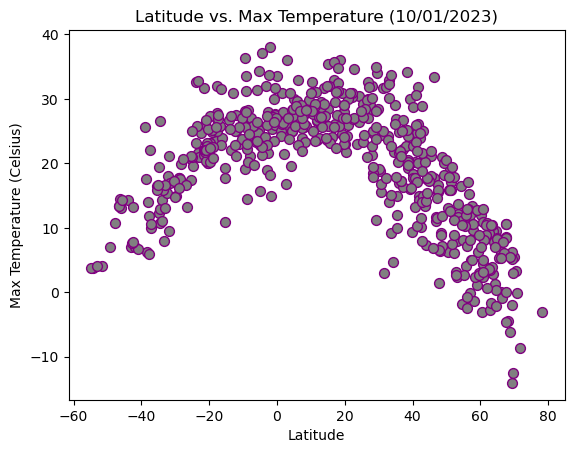

In [156]:
# Build scatter plot for latitude vs. temperature #plt.grid(True) not working????????????????????????
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (10/01/2023)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSTemperaturebyYK.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

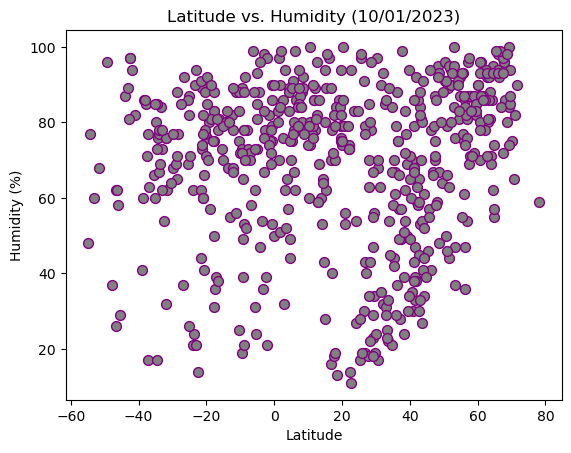

In [157]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (10/01/2023)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

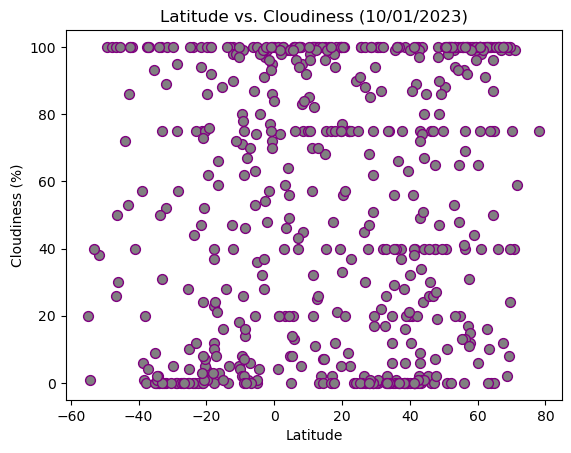

In [158]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (10/01/2023)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

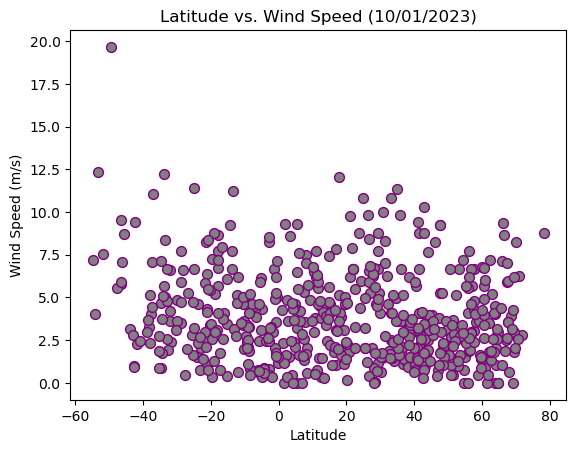

In [159]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='purple', c='gray', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (10/01/2023)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [182]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

In [183]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,berja,36.8469,-2.9497,22.09,57,0,1.10,ES,1696194989
4,nuuk,64.1835,-51.7216,1.34,86,75,1.03,GL,1696194989
5,glace bay,46.1969,-59.9570,17.76,78,75,3.09,CA,1696194989
6,bazarak,35.3129,69.5152,11.93,44,56,2.00,AF,1696194989
7,newman,37.3138,-121.0208,22.25,49,37,1.34,US,1696194861
8,znamenskoye,57.1281,73.8282,5.00,96,17,2.43,RU,1696194990
9,kanniyakumari,8.0833,77.5667,25.69,88,95,7.47,IN,1696194856
10,tulun,54.5611,100.5792,-1.76,81,48,0.78,RU,1696194990
11,albany,42.6001,-73.9662,25.23,65,2,1.34,US,1696194888


In [184]:
northern_hemi_df.to_csv("../output_data/northernhemidf.csv")

In [185]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,9.95,63,100,11.08,SH,1696194989
1,adamstown,-25.0660,-130.1015,20.52,82,10,11.43,PN,1696194989
2,papatowai,-46.5619,169.4708,13.45,62,26,9.56,NZ,1696194989
12,waitangi,-43.9535,-176.5597,14.34,87,72,3.13,NZ,1696194990
13,port-aux-francais,-49.3500,70.2167,6.96,96,100,19.66,TF,1696194991
15,puerto natales,-51.7236,-72.4875,4.15,68,38,7.53,CL,1696194991
16,saint-pierre,-21.3393,55.4781,21.82,73,0,2.57,RE,1696194991
20,grytviken,-54.2811,-36.5092,3.78,77,1,4.03,GS,1696194992
22,minas de marcona,-15.2119,-75.1103,17.70,70,16,6.06,PE,1696194992


In [186]:
southern_hemi_df.to_csv("../output_data/southernhemidf.csv")

###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: -0.8140870643668972


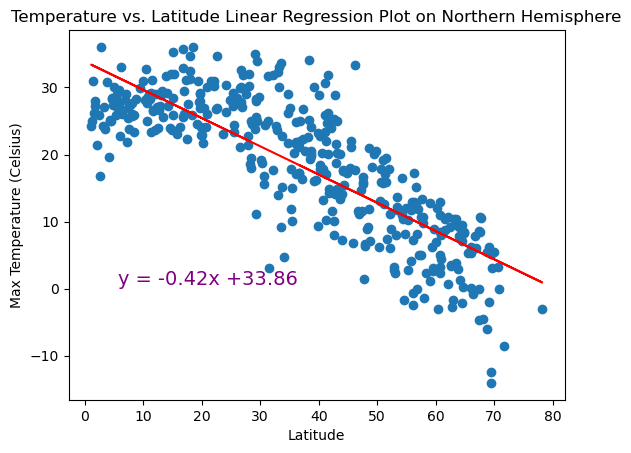

In [190]:
# Linear regression on Northern Hemisphere #color dont change???????????????????????????????
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"] 
linear_regression(x_values, y_values, "Max Temp", (5, 10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.6,0.6),fontsize=14,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Temperature vs. Latitude Linear Regression Plot on Northern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/TempvsLatLinearRegressiononNorthernHemisphere.png")
plt.show()


The r-squared value is: 0.7522230058458843


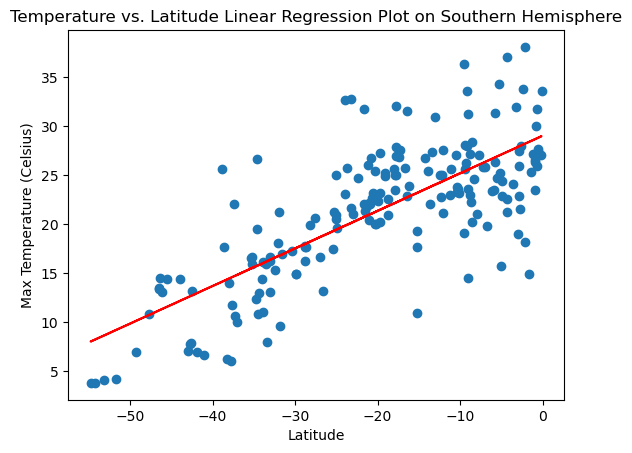

In [209]:
# Linear regression on Southern Hemisphere #where is y=.......??????????????????????????
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"] 
linear_regression(x_values, y_values, "Max Temp", (10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Temperature vs. Latitude Linear Regression Plot on Southern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/TempvsLatLinearRegressiononSouthernHemisphere.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

ValueError: x and y must have same first dimension, but have shapes (396,) and (187,)

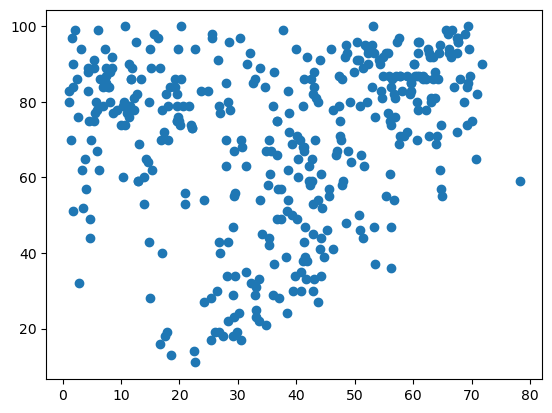

In [210]:
# Northern Hemisphere #dont work??????????????????????????????
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"] 
linear_regression(x_values, y_values, "Humidity", (40,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.7,0.7),fontsize=13,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/HumidityvsLatLinearRegressiononNorthernHemisphere.png")
plt.show()

The r-squared value is: 0.7522230058458843


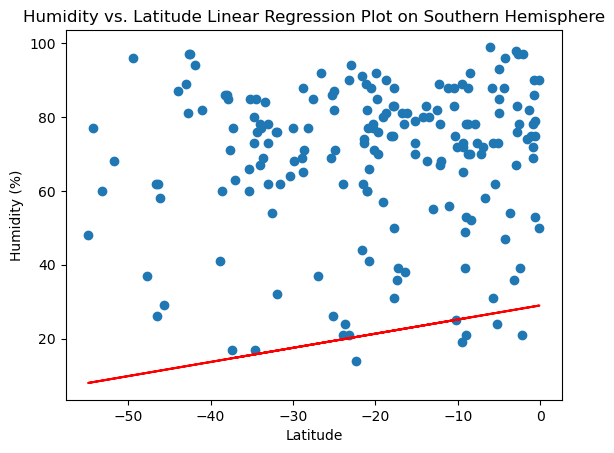

In [211]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"] 
linear_regression(x_values, y_values, "Humidity", (-35,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.7,0.7),fontsize=13,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/HumidityvsLatLinearRegressiononSouthernHemisphere.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

ValueError: x and y must have same first dimension, but have shapes (396,) and (187,)

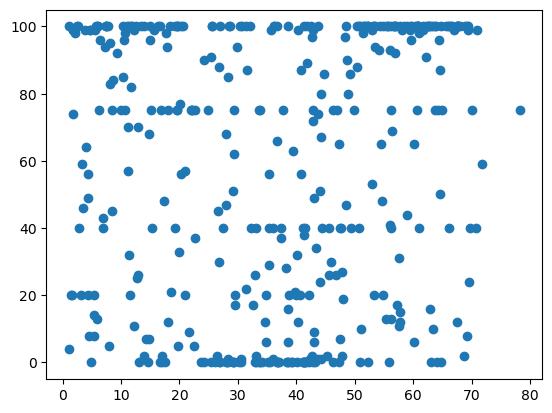

In [217]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"] 
linear_regression(x_values, y_values, "Cloudiness", (20, 10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.5,0.5),fontsize=14,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/CloudinessVSLatitudeLinearRegressionPlotonNorthernHemisphere.png")
plt.show()

The r-squared value is: 0.7522230058458843


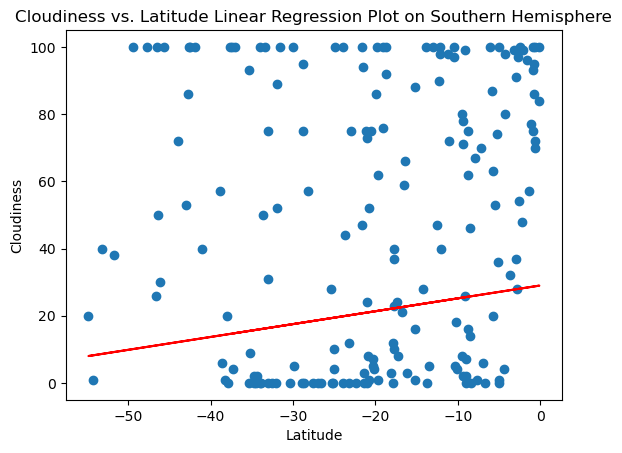

In [216]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"] 
linear_regression(x_values, y_values, "Cloudiness", (45, 10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.5,0.5),fontsize=14,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude Linear Regression Plot on Southern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/CloudinessVSLatitudeLinearRegressionPlotonSouthernHemisphere.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

ValueError: x and y must have same first dimension, but have shapes (396,) and (187,)

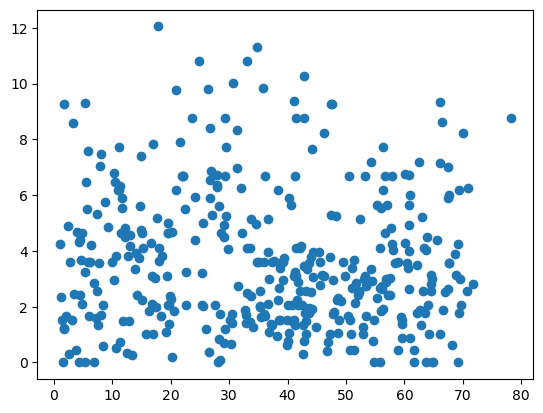

In [218]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"] 
linear_regression(x_values, y_values, "Wind Speed", (10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude Linear Regression Plot on Northern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/WindSpeedVSLatitudeLinearRegressionPlotonNorthernHemisphere.png")
plt.show()

The r-squared value is: 0.7522230058458843


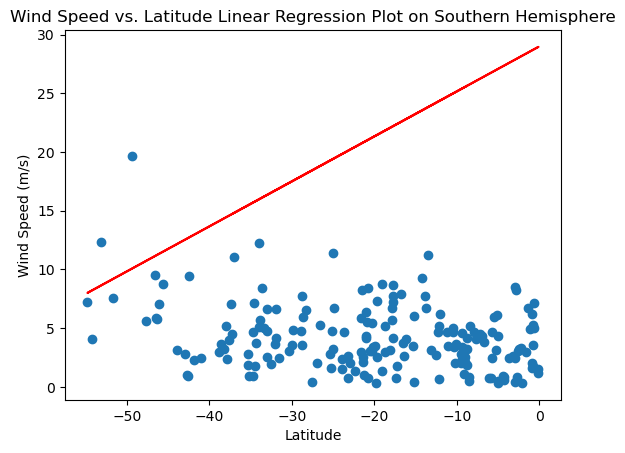

In [219]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"] 
linear_regression(x_values, y_values, "Wind Speed", (10,10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude Linear Regression Plot on Southern Hemisphere")
print(f"The r-squared value is: {rvalue}")
plt.savefig("../output_data/WindSpeedVSLatitudeLinearRegressionPlotonSouthernHemisphere.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE